## Data Preprocessing of Laptops
#### Step-0
* First of all to perform all actions we have to import pandas, numpy, matplotlib and seaborn.
* For smooth conduct of preprocessing we are ignoring warnings, for this we have to import warnings and apply warnings.filterwarnings("ignore").

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Step-1
* First of all we have to insert data using read_csv or read_excel function of pandas.for this we have to make a dataframe, here we have taken this as data.
* Then we have to copy the data as df to keep the actual data as it is.
* To see the top 5 rows we have applied df.head().

In [2]:
data = pd.read_csv("laptops.csv")
df = data.copy()
df.head()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,MSI,Business Laptop,17.040680,IPS Panel Retina Display 2560x1600,Intel Core i7,12GB,512GB SSD,Intel Iris Xe Graphics,Linux,2.064834,35844.099371
1,Chuwi,2 in 1 Convertible,16.542395,Full HD,Intel Core i5,12GB,128GB PCIe SSD,Intel Iris Xe Graphics,No OS,4.060656,37019.059051
2,hp,WorkStation,17.295294,Full HD,Intel Xeon E3-1505M,8GB,1TB HDD,Intel Iris Xe Graphics,Linux,2.901689,33329.360341
3,MSI,2 in 1 Convertible,11.526203,2K,Intel Core i7,16GB,512GB NVMe SSD,Intel Iris Xe Graphics,Windows 10,2.914843,68631.102486
4,Microsoft,Gaming,12.649634,Full HD,Intel Core i5,8GB,512GB SSD,AMD Radeon RX 5600M,Windows 10,4.341995,33842.479566


#### Step-2
* Applied df.info() which gives us the information of dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CompanyName       1000 non-null   object 
 1   TypeOfLaptop      1000 non-null   object 
 2   Inches            1000 non-null   float64
 3   ScreenResolution  1000 non-null   object 
 4   Cpu               1000 non-null   object 
 5   Ram               1000 non-null   object 
 6   Memory            1000 non-null   object 
 7   Gpu               1000 non-null   object 
 8   OpSys             1000 non-null   object 
 9   Weight            1000 non-null   float64
 10  Price             1000 non-null   float64
dtypes: float64(3), object(8)
memory usage: 86.1+ KB


* In the above step's output we can see that the dataset has 1000 rows and 11 columns.
* All the columns have ideal datatypes except Ram and Memory as both has the datatype as object(string) , hence we have to convert this into integer type. This will be our primary goal.

#### Step-3
* Now we have applied df.describe() which gives us the descriptions of numerical columns.

In [4]:
df.describe()

,Inches,Weight,Price
count,1000.000000,1000.000000,1000.000000
mean,14.496646,3.469800,51602.255339
std,2.066624,0.857112,13802.833231
min,11.005842,2.000819,30060.275100
25%,12.677791,2.720228,40376.617670
50%,14.509298,3.477824,50683.971717
75%,16.313026,4.189891,61897.280126
max,17.998786,4.994556,115137.368077


* The observations of this step are as following
* count is 1000 for Inches, Weight and Price column.
* Mean of Inches is 14.5 and std. deviation is 2 which means that our screen size can go like 8 inches, 10inches, 12inches, 16inches, 18inches etc.
* Minimum screen size is 11inches and 25 % means the first 250 rows have the screen size as 12.67inches.
* One important observation is that the mean and 50% data (median) is almost same. This implies that the data is Normally Distributed.
* Similar observations have been done on Weight and Price column and clearly observed that the data is Normally Distributed. 

#### Step-4
* To get the individual column information we applied df["ColumnName"].value_counts().
* Here we applied it to the first column which is "CompanyName"

In [5]:
df["CompanyName"].value_counts()

CompanyName
MSI          128
Microsoft    118
Apple        113
lenevo       113
Asus         112
Chuwi        109
Acer         107
Dell         101
hp            99
Name: count, dtype: int64

* "Chuwi" is a laptop company which we are not familiar so we decided to replace it with "Samsung". For this we used replace function as below.

In [6]:
df["CompanyName"] = df["CompanyName"].replace("Chuwi", "Samsung")

In [7]:
### Again applying value_counts() to see if the changes have been done or not.
df["CompanyName"].value_counts()

CompanyName
MSI          128
Microsoft    118
Apple        113
lenevo       113
Asus         112
Samsung      109
Acer         107
Dell         101
hp            99
Name: count, dtype: int64

* As we can see the max count is 128 and min is 99, which are quite close. hence no further action needed.

#### Step-5
* Now we moveto second column which is "TypeOfLaptop"

In [8]:
df["TypeOfLaptop"].value_counts()

TypeOfLaptop
Business Laptop       176
WorkStation           175
Gaming                168
UltraBook             166
2 in 1 Convertible    162
NoteBook              153
Name: count, dtype: int64

* As we can see the Names of TypeOfLaptop is quite long so we can change this by using replace function as before.
* We have replaced "Business Laptop" by "Business" and "2 in 1 Convertible" by "2_in_1".

In [9]:
df["TypeOfLaptop"] = df["TypeOfLaptop"].replace("Business Laptop" , "Business")
df["TypeOfLaptop"] = df["TypeOfLaptop"].replace("2 in 1 Convertible" , "2_in_1")

In [10]:
### Again applying value_counts() to see if the changes have been done or not.
df["TypeOfLaptop"].value_counts()

TypeOfLaptop
Business       176
WorkStation    175
Gaming         168
UltraBook      166
2_in_1         162
NoteBook       153
Name: count, dtype: int64

#### Step-6
* As the data type of Inches is float64 , we have to convert it into int64.
* For this we have used ".astype("datatype")" method.

In [11]:
df["Inches"]=df["Inches"].astype("int64")

In [12]:
### Applied ".dtype" to check the datatype of Inches Column.
df["Inches"].dtype

dtype('int64')

#### Step-7
* Coming to the next column which is "ScreenResolution".

In [13]:
df["ScreenResolution"].value_counts()

ScreenResolution
2K                                           181
4K                                           179
IPS Panel Full HD / Touchscreen 1920x1080    176
Full HD                                      162
HD 1920x1080                                 160
IPS Panel Retina Display 2560x1600           142
Name: count, dtype: int64

* Here we can observe that the names are too long so we decided to convert the name in shorter format such as "IPS Panel Full HD / Touchscreen 1920x1080" to "Touchscreen" using ".replace()" method.

In [14]:
df["ScreenResolution"] = df["ScreenResolution"].replace("IPS Panel Full HD / Touchscreen 1920x1080", "Touchscreen")
df["ScreenResolution"] = df["ScreenResolution"].replace("HD 1920x1080","HD")
df["ScreenResolution"] = df["ScreenResolution"].replace("IPS Panel Retina Display 2560x1600", "Retina Display")

In [15]:
### Applied value_counts() to confirm the changes.
df["ScreenResolution"].value_counts()

ScreenResolution
2K                181
4K                179
Touchscreen       176
Full HD           162
HD 1920x1080      160
Retina Display    142
Name: count, dtype: int64

In [16]:
df.head()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,MSI,Business,17,Retina Display,Intel Core i7,12GB,512GB SSD,Intel Iris Xe Graphics,Linux,2.064834,35844.099371
1,Samsung,2_in_1,16,Full HD,Intel Core i5,12GB,128GB PCIe SSD,Intel Iris Xe Graphics,No OS,4.060656,37019.059051
2,hp,WorkStation,17,Full HD,Intel Xeon E3-1505M,8GB,1TB HDD,Intel Iris Xe Graphics,Linux,2.901689,33329.360341
3,MSI,2_in_1,11,2K,Intel Core i7,16GB,512GB NVMe SSD,Intel Iris Xe Graphics,Windows 10,2.914843,68631.102486
4,Microsoft,Gaming,12,Full HD,Intel Core i5,8GB,512GB SSD,AMD Radeon RX 5600M,Windows 10,4.341995,33842.479566


#### Step-8
* Next column is "Cpu". Applied  ".value_counts()" to get the information of this column.

In [17]:
df["Cpu"].value_counts()

Cpu
Intel Xeon E3-1505M               114
Intel Atom x5-Z8550               111
Intel Core i5                     105
Intel Pentium Quad Core N4200     101
Intel Celeron Dual Core 3855U      98
Intel Core i7                      96
Intel Core i9                      95
AMD Ryzen 5                        94
AMD Ryzen 7                        94
AMD A9-Series 9420                 92
Name: count, dtype: int64

* Here we can observe that the names are too long so we decided to convert the name in shorter format. example: "Intel Xeon E3-1505M " to "Intel Xeon" using ".replace()" method etc.

In [18]:
df["Cpu"] = df["Cpu"].replace("Intel Xeon E3-1505M ", "Intel Xeon")
df["Cpu"] = df["Cpu"].replace("Intel Atom x5-Z8550", "Intel Atom")
df["Cpu"] = df["Cpu"].replace("Intel Core i5", "Intel i5")
df["Cpu"] = df["Cpu"].replace("Intel Core i7", "Intel i7")
df["Cpu"] = df["Cpu"].replace("Intel Core i9", "Intel i9")
df["Cpu"] = df["Cpu"].replace("Intel Pentium Quad Core N4200", "Intel Pentium")
df["Cpu"] = df["Cpu"].replace("Intel Celeron Dual Core 3855U ", "Intel Celeron")
df["Cpu"] = df["Cpu"].replace("AMD Ryzen 5", "AMD 5")
df["Cpu"] = df["Cpu"].replace("AMD Ryzen 7", "AMD 7")
df["Cpu"] = df["Cpu"].replace("AMD A9-Series 9420", "AMD A9")

In [19]:
### Applied value_counts() to confirm the changes.
df["Cpu"].value_counts()

Cpu
Intel Xeon       114
Intel Atom       111
Intel i5         105
Intel Pentium    101
Intel Celeron     98
Intel i7          96
Intel i9          95
AMD 5             94
AMD 7             94
AMD A9            92
Name: count, dtype: int64

#### Step-9
* Next column is "Ram". applied ".value_counts()" to get the informations.

In [20]:
df["Ram"].value_counts()

Ram
8GB     270
12GB    247
4GB     243
16GB    240
Name: count, dtype: int64

* We can see that the Ram is given as 8GB, 12GB, 4GB, 16GB.
* hence we want to erase this string GB and show the Ram as 8,12,4,16.
* for this task we used ".str.replace()" because GB is part of a text and we do not want to erase or replace the complete text.

In [21]:
### GB is replaced or erased.
df["Ram"]=df["Ram"].str.replace("GB","")

In [22]:
### Now changing its type as int64 using ".astype()" because Ram is showing in integer form now.
df["Ram"]=df["Ram"].astype("int64")

In [23]:
df.head()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,MSI,Business,17,Retina Display,Intel i7,12,512GB SSD,Intel Iris Xe Graphics,Linux,2.064834,35844.099371
1,Samsung,2_in_1,16,Full HD,Intel i5,12,128GB PCIe SSD,Intel Iris Xe Graphics,No OS,4.060656,37019.059051
2,hp,WorkStation,17,Full HD,Intel Xeon,8,1TB HDD,Intel Iris Xe Graphics,Linux,2.901689,33329.360341
3,MSI,2_in_1,11,2K,Intel i7,16,512GB NVMe SSD,Intel Iris Xe Graphics,Windows 10,2.914843,68631.102486
4,Microsoft,Gaming,12,Full HD,Intel i5,8,512GB SSD,AMD Radeon RX 5600M,Windows 10,4.341995,33842.479566


#### Step-10
* Next column is "Memory". Applied ".value_counts" to get the information.

In [24]:
df["Memory"].value_counts()

Memory
1TB HDD                105
2TB SATA SSD            63
1TB SSHD                61
4TB HDD                 60
512GB eMMC              59
128GB PCIe SSD          58
1TB NVMe SSD            55
256GB PCIe SSD          55
512GB NVMe SSD          54
512GB SSD               51
256GB SSD               50
2TB HDD                 50
1TB Fusion Drive        50
2TB NVMe SSD            49
256GB Flash Storage     46
6TB HDD                 45
256GB eMMC              45
128GB SSD               44
Name: count, dtype: int64

* We can clearly see that the Memory names are too long which can create problems while Regression Analysis, So we have to cut it short and remove the extra text.
* and also we have to arrange the whole Memory column into two simple categories as "SSD" and "HDD" and then we have to bifurcate it into two columns.
* For this operation we used ".str.replace()" as in previous task.
* The important thing to remember is we have to take the text as well as spaces in it while replacing otherwise it can double our work.

In [25]:
df["Memory"] = df["Memory"].str.replace("SATA ","")
df["Memory"] = df["Memory"].str.replace("SSHD","SSD")
df["Memory"] = df["Memory"].str.replace("eMMC","SSD")
df["Memory"] = df["Memory"].str.replace("PCIe ","")
df["Memory"] = df["Memory"].str.replace("NVMe ","")
df["Memory"] = df["Memory"].str.replace("Fusion Drive","HDD")
df["Memory"] = df["Memory"].str.replace("Flash Storage","SSD")

In [26]:
### Again applied value_counts() to confirm the changes. Arranged all the types into two simple categories
### as SSD and HDD but not divided the column yet.
df["Memory"].value_counts()

Memory
256GB SSD    196
512GB SSD    164
1TB HDD      155
1TB SSD      116
2TB SSD      112
128GB SSD    102
4TB HDD       60
2TB HDD       50
6TB HDD       45
Name: count, dtype: int64

* We have changed all the types into two simple categories but not separated them . For the separation we have to use the following code.

In [27]:
### converting the string into its part (for ex if 256GB SSD-->256GB ) if text has SSD , otherwise convert into 0 for SSD column.
dummy_ssd = list(map(lambda x: x[:-3] if x[-3:]=="SSD" else "0", df["Memory"]))

In [28]:
len(dummy_ssd)

1000

In [29]:
### converting the string into its part (for ex if 1TB HDD-->1TB ) if text has HDD , otherwise convert into 0 for HDD column.
dummy_hdd = list(map(lambda x: x[:-3] if x[-3:]=="HDD" else "0", df["Memory"]))

In [30]:
len(dummy_hdd)

1000

In [31]:
### creating the SSD and HDD columns where the values will be filled from dummy_ssd and dummy_hdd respectively.
df["SSD"] = dummy_ssd
df["HDD"] = dummy_hdd

In [32]:
df.head()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,SSD,HDD
0,MSI,Business,17,Retina Display,Intel i7,12,512GB SSD,Intel Iris Xe Graphics,Linux,2.064834,35844.099371,512GB,0
1,Samsung,2_in_1,16,Full HD,Intel i5,12,128GB SSD,Intel Iris Xe Graphics,No OS,4.060656,37019.059051,128GB,0
2,hp,WorkStation,17,Full HD,Intel Xeon,8,1TB HDD,Intel Iris Xe Graphics,Linux,2.901689,33329.360341,0,1TB
3,MSI,2_in_1,11,2K,Intel i7,16,512GB SSD,Intel Iris Xe Graphics,Windows 10,2.914843,68631.102486,512GB,0
4,Microsoft,Gaming,12,Full HD,Intel i5,8,512GB SSD,AMD Radeon RX 5600M,Windows 10,4.341995,33842.479566,512GB,0


In [33]:
### Now dropping the memory column as there is no need of it because we have categorised it into SSD and HDD columns.
df.drop("Memory", axis=1, inplace=True)

In [34]:
df.head()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,SSD,HDD
0,MSI,Business,17,Retina Display,Intel i7,12,Intel Iris Xe Graphics,Linux,2.064834,35844.099371,512GB,0
1,Samsung,2_in_1,16,Full HD,Intel i5,12,Intel Iris Xe Graphics,No OS,4.060656,37019.059051,128GB,0
2,hp,WorkStation,17,Full HD,Intel Xeon,8,Intel Iris Xe Graphics,Linux,2.901689,33329.360341,0,1TB
3,MSI,2_in_1,11,2K,Intel i7,16,Intel Iris Xe Graphics,Windows 10,2.914843,68631.102486,512GB,0
4,Microsoft,Gaming,12,Full HD,Intel i5,8,AMD Radeon RX 5600M,Windows 10,4.341995,33842.479566,512GB,0


* The last task is to remove the GB and TB from SSD and HDD columns
* And the values should be in a single scale hence TB values are multiplied by 1024 to convert it into GB.

In [35]:
df["SSD"].value_counts()

SSD
0         310
256GB     196
512GB     164
1TB       116
2TB       112
128GB     102
Name: count, dtype: int64

In [36]:
# to remove GB and TB from SSD column
# and to keep in a single scale TB values are multiplied by 1024
ssd = []
for i in df["SSD"]:
    if "GB" in i:
        ssd.append(int(i.replace("GB","")))
    elif "TB" in i:
        ssd.append(int(i.replace("TB",""))*1024)
    else:
        ssd.append(int(i))

In [37]:
df["SSD"] = ssd

In [38]:
df["SSD"].dtype

dtype('int64')

In [39]:
df["HDD"].value_counts()

HDD
0       690
1TB     155
4TB      60
2TB      50
6TB      45
Name: count, dtype: int64

In [40]:
### as we can see that the values in HDD columns are only in TB hence we have to just erase TB using ".str.replace()".
df["HDD"]= df["HDD"].str.replace("TB","")

In [41]:
### converting the TB value into GB by multiplying 1024 and also the data type into int64 by using ".astype()".
df["HDD"]= df["HDD"].astype("int64")*1024

In [42]:
df.head()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,SSD,HDD
0,MSI,Business,17,Retina Display,Intel i7,12,Intel Iris Xe Graphics,Linux,2.064834,35844.099371,512,0
1,Samsung,2_in_1,16,Full HD,Intel i5,12,Intel Iris Xe Graphics,No OS,4.060656,37019.059051,128,0
2,hp,WorkStation,17,Full HD,Intel Xeon,8,Intel Iris Xe Graphics,Linux,2.901689,33329.360341,0,1024
3,MSI,2_in_1,11,2K,Intel i7,16,Intel Iris Xe Graphics,Windows 10,2.914843,68631.102486,512,0
4,Microsoft,Gaming,12,Full HD,Intel i5,8,AMD Radeon RX 5600M,Windows 10,4.341995,33842.479566,512,0


#### Step-11
* Next column is "Gpu".by applying value_counts() we can get the information.

In [43]:
df["Gpu"].value_counts()

Gpu
NVIDIA GeForce GTX 1650    348
AMD Radeon RX 5600M        339
Intel Iris Xe Graphics     313
Name: count, dtype: int64

* As we can see that the Gpu has too long names hence we will change this by lambda function.

In [44]:
gpu = list(map(lambda x: x[:6] if x[0] == "N" else (x[:3] if x[0]=="A" else x[:5]), df["Gpu"]))

* String will change into its parts as following
* if Starting index has Letter "N" then it will change into "NVIDIA"
* If starting index has Letter "A" then it will change into "AMD".
* If starting index has Letter anything other than "N" or "A" then it will change into x[:5]-->Intel

In [45]:
### Editing the column Gpu by giving it value of gpu variable
df["Gpu"]= gpu

In [46]:
df["Gpu"].value_counts()

Gpu
NVIDIA    348
AMD       339
Intel     313
Name: count, dtype: int64

In [47]:
df.head()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,SSD,HDD
0,MSI,Business,17,Retina Display,Intel i7,12,Intel,Linux,2.064834,35844.099371,512,0
1,Samsung,2_in_1,16,Full HD,Intel i5,12,Intel,No OS,4.060656,37019.059051,128,0
2,hp,WorkStation,17,Full HD,Intel Xeon,8,Intel,Linux,2.901689,33329.360341,0,1024
3,MSI,2_in_1,11,2K,Intel i7,16,Intel,Windows 10,2.914843,68631.102486,512,0
4,Microsoft,Gaming,12,Full HD,Intel i5,8,AMD,Windows 10,4.341995,33842.479566,512,0


#### Step-12
* Next column is "Opsys". by applying value_counts() we can get the information.

In [48]:
df["OpSys"].value_counts()

OpSys
No OS         224
macOS         219
Windows 10    194
Linux         187
Windows 11    176
Name: count, dtype: int64

* Changing the long names into short using ".str.replace()" such as No OS --> D OS , Windows --> Win etc.

In [49]:
df["OpSys"] = df["OpSys"].str.replace("No ","D")
df["OpSys"] = df["OpSys"].str.replace("Windows ","Win")

In [50]:
### To view the unique values of Opsys we applied ".unique()" method.
df["OpSys"].unique()

array(['Linux', 'DOS', 'Win10', 'macOS', 'Win11'], dtype=object)

In [51]:
df.head()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,SSD,HDD
0,MSI,Business,17,Retina Display,Intel i7,12,Intel,Linux,2.064834,35844.099371,512,0
1,Samsung,2_in_1,16,Full HD,Intel i5,12,Intel,DOS,4.060656,37019.059051,128,0
2,hp,WorkStation,17,Full HD,Intel Xeon,8,Intel,Linux,2.901689,33329.360341,0,1024
3,MSI,2_in_1,11,2K,Intel i7,16,Intel,Win10,2.914843,68631.102486,512,0
4,Microsoft,Gaming,12,Full HD,Intel i5,8,AMD,Win10,4.341995,33842.479566,512,0


#### Step-13
* Next column is Price. we dont need this huge numbers with decimals so we convert its datatype as int64 using ".astype()".

In [52]:
df["Price"] = df["Price"].astype("int64")

In [53]:
df.head()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,SSD,HDD
0,MSI,Business,17,Retina Display,Intel i7,12,Intel,Linux,2.064834,35844,512,0
1,Samsung,2_in_1,16,Full HD,Intel i5,12,Intel,DOS,4.060656,37019,128,0
2,hp,WorkStation,17,Full HD,Intel Xeon,8,Intel,Linux,2.901689,33329,0,1024
3,MSI,2_in_1,11,2K,Intel i7,16,Intel,Win10,2.914843,68631,512,0
4,Microsoft,Gaming,12,Full HD,Intel i5,8,AMD,Win10,4.341995,33842,512,0


# Data Visualization / Analysis

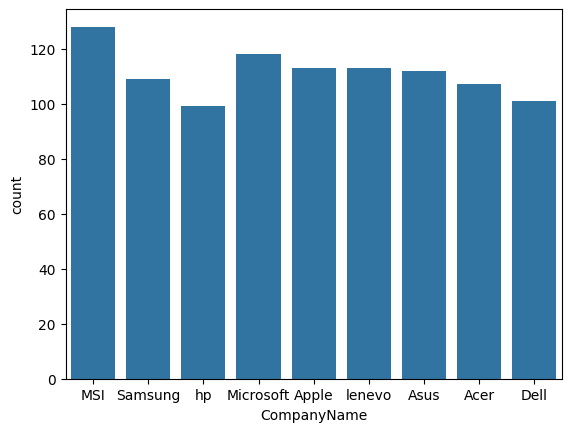

In [54]:
sns.countplot(x = df["CompanyName"])
plt.show() 

In [55]:
### To analyse the relation between two columns we use "crosstab".
pd.crosstab(df["CompanyName"], df["TypeOfLaptop"])

TypeOfLaptop,2_in_1,Business,Gaming,NoteBook,UltraBook,WorkStation
CompanyName,,,,,,
Acer,18,15,16,17,17,24
Apple,24,16,21,12,20,20
Asus,17,20,21,11,25,18
Dell,12,16,21,15,17,20
MSI,16,28,22,26,13,23
Microsoft,27,22,27,15,13,14
Samsung,13,24,14,18,18,22
hp,17,15,16,20,21,10
lenevo,18,20,10,19,22,24
